# Elon Tweets

Preguntas: ¿Cuál fue el tweet mas gustado de Elon desde 2015 a lo que va de 2022 (4/2022)?, ¿el mas compartido? y ¿el que mas respuestas tuvo? ¿qué nos dice la hora de publicacion de sus tweets sobre su vida diaria?, ¿existe relación entre sus tweets y crecimiento de cripto?

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# En el caso de que se quiera analizar la gente con la que Elon interactúa, se podría dejar la columna reply_to. Dejo la columna id para eliminar luego duplicados en caso de que los haya

tweets_2015_2020= pd.read_csv("datasets/tweets/2015_2020.csv", usecols=['id', 'date', 'time', 'tweet', 'replies_count', 'retweets_count', 'likes_count']) 
tweets_2021 = pd.read_csv("datasets/tweets/2021.csv", usecols=['id', 'date', 'time', 'tweet', 'replies_count', 'retweets_count', 'likes_count'])
tweets_2022 = pd.read_csv("datasets/tweets/2022.csv", usecols=['id', 'date', 'time', 'tweet', 'replies_count', 'retweets_count', 'likes_count'])

In [3]:
tweet_df = pd.concat([tweets_2015_2020, tweets_2021, tweets_2022])

In [4]:
#tweet_df es una dataframe cuyas columnas son: 'id', 'date', 'time', 'tweet', 'replies_count', 'retweets_count'y 'likes_count', se dejo el index agregado por phyton porque ayuda a ordenar los tweets y a saber la cantidad
tweet_df

,id,date,time,tweet,replies_count,retweets_count,likes_count
0,1282939902531796993,2020-07-14,07:28:03,Cute,222,176,7883
1,1282844872571904000,2020-07-14,01:10:26,Wow,346,180,4241
2,1282805559834492929,2020-07-13,22:34:13,Reusability is essential. A rocket that is sin...,102,126,1551
3,1282800187308572672,2020-07-13,22:12:52,Wild times!,438,415,13421
4,1282800078000803840,2020-07-13,22:12:26,We’re being extra paranoid. Maximizing probabi...,128,155,4238
...,...,...,...,...,...,...,...
1023,1477775713172402176,2022-01-03,02:56:00,https://t.co/LA9hPzVlGx,25611,51383,473530
1024,1477706142461706248,2022-01-02,22:19:33,Let’s make the roaring 20’s happen!,22500,26951,320201
1025,1477700424933253123,2022-01-02,21:56:50,Great work by Tesla team worldwide!,5630,4459,66405
1026,1477096955658579974,2022-01-01,05:58:52,@BLKMDL3 @Tesla 🔥,1074,472,45704


In [5]:
#Las columnas se encuentran en snake case
tweet_df.columns

Index(['id', 'date', 'time', 'tweet', 'replies_count', 'retweets_count',
       'likes_count'],
      dtype='object')

In [6]:
tweet_df.head()

,id,date,time,tweet,replies_count,retweets_count,likes_count
0,1282939902531796993,2020-07-14,07:28:03,Cute,222,176,7883
1,1282844872571904000,2020-07-14,01:10:26,Wow,346,180,4241
2,1282805559834492929,2020-07-13,22:34:13,Reusability is essential. A rocket that is sin...,102,126,1551
3,1282800187308572672,2020-07-13,22:12:52,Wild times!,438,415,13421
4,1282800078000803840,2020-07-13,22:12:26,We’re being extra paranoid. Maximizing probabi...,128,155,4238


In [7]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13429 entries, 0 to 1027
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              13429 non-null  int64 
 1   date            13429 non-null  object
 2   time            13429 non-null  object
 3   tweet           13429 non-null  object
 4   replies_count   13429 non-null  int64 
 5   retweets_count  13429 non-null  int64 
 6   likes_count     13429 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 839.3+ KB


In [8]:
tweet_df.describe()

,id,replies_count,retweets_count,likes_count
count,1.342900e+04,13429.000000,13429.000000,1.342900e+04
mean,1.171992e+18,1295.035967,2933.753965,2.836605e+04
std,2.262213e+17,4320.082272,11129.945487,7.723859e+04
min,5.610022e+17,0.000000,0.000000,2.100000e+01
25%,1.015690e+18,64.000000,65.000000,1.363000e+03
50%,1.177062e+18,217.000000,264.000000,4.649000e+03
75%,1.382541e+18,721.000000,1208.000000,1.703500e+04
max,1.500030e+18,120523.000000,384289.000000,1.682551e+06


In [9]:
tweet_df['date']= pd.to_datetime(tweet_df.date)

In [10]:
tweet_df['time']= pd.to_datetime(tweet_df['time'],format= '%H:%M:%S').dt.hour

| Column        | Data group          | Python obj class |
|---------------|---------------------|------------------|
| index         | Numeric Integer     | int              |
| date          | categorical ordinal | str              |
| time          | categorical ordinal | str              |
| tweet         | categorical nominal | str              |
| replies_count | numeric integer     | int              |
| retweet_count | numeric integer     | int              |
| likes_count   | numeric integer     | int              |
| id            | numeric integer     | int              |

In [11]:
tweet_df.duplicated(subset='id')

0       False
1       False
2       False
3       False
4       False
        ...  
1023     True
1024     True
1025     True
1026     True
1027     True
Length: 13429, dtype: bool

In [12]:
tweet_df = tweet_df.drop_duplicates(subset='id')

In [13]:
tweet_df.isna()

,id,date,time,tweet,replies_count,retweets_count,likes_count
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
509,False,False,False,False,False,False,False
510,False,False,False,False,False,False,False
511,False,False,False,False,False,False,False
512,False,False,False,False,False,False,False


In [14]:
tweet_df['date']

0     2020-07-14
1     2020-07-14
2     2020-07-13
3     2020-07-13
4     2020-07-13
         ...    
509   2022-01-03
510   2022-01-02
511   2022-01-02
512   2022-01-01
513   2022-01-01
Name: date, Length: 12915, dtype: datetime64[ns]

In [15]:
tweet_df['time']

0       7
1       1
2      22
3      22
4      22
       ..
509     2
510    22
511    21
512     5
513     4
Name: time, Length: 12915, dtype: int64

<AxesSubplot:xlabel='date'>

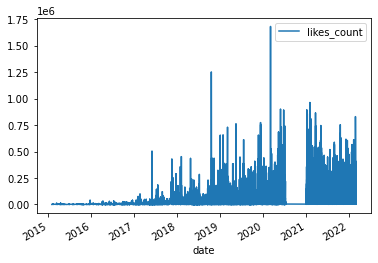

In [16]:
tweet_df.plot(x='date', y='likes_count')

<AxesSubplot:xlabel='date'>

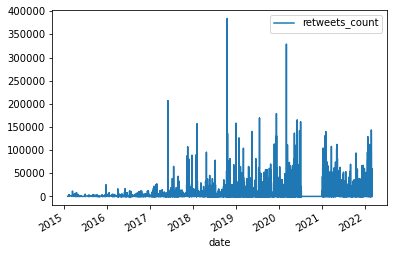

In [17]:
tweet_df.plot(x='date', y='retweets_count')

<AxesSubplot:xlabel='date'>

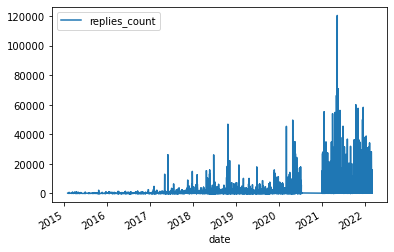

In [18]:
tweet_df.plot(x='date', y='replies_count')

# ¿Cuales fueron sus tweets más respondidos?


In [19]:
#Usando .sort_values se puede ordenar la dataframe en funcion de una columna elegida

In [20]:
tweet_df.sort_values(by='replies_count', ascending=False)

,id,date,time,tweet,replies_count,retweets_count,likes_count
2141,1392602041025843203,2021-05-13,2,Tesla &amp; Bitcoin https://t.co/YSswJmVZhP,120523,73792,491785
2151,1392030108274159619,2021-05-11,12,Do you want Tesla to accept Doge?,96563,94898,392471
2095,1395328697436033032,2021-05-20,14,How much is that Doge in the window? https://...,70818,52441,302873
2103,1395027147161489412,2021-05-19,18,Tesla has 💎 🙌,68672,55180,452335
2182,1390387635961610242,2021-05-06,23,Make humanity a multiplanet species!,66264,60063,606101
...,...,...,...,...,...,...,...
9079,656973144306094080,2015-10-21,23,@bonnienorman thanks Bonnie :),0,7,62
8851,716749717795946496,2016-04-03,22,@mpatfield no problem,0,6,110
8619,752195886990569473,2016-07-10,17,exactly,0,0,77
1130,1433254957101109254,2021-09-02,6,@VitalikButerin https://t.co/EFGqFcsJ6S,0,934,21065


<AxesSubplot:ylabel='tweet'>

C:\Users\Usuario\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Usuario\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Usuario\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Usuario\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128588 missing from current font.
  font.set_text(s, 0, flags=flags)


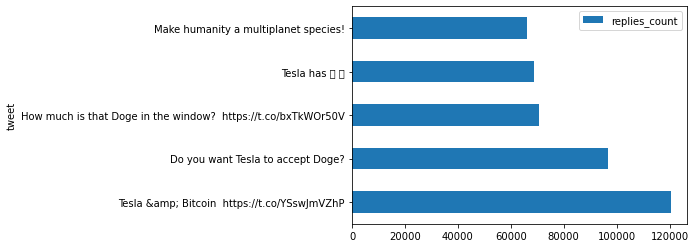

In [21]:
tweet_df.sort_values(by='replies_count', ascending=False).head().plot.barh(y='replies_count', x="tweet")


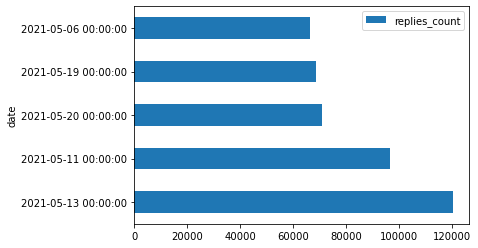

In [22]:
tweet_df.sort_values(by='replies_count', ascending=False).head().plot.barh(y='replies_count', x="date")
tweets_most_replied = tweet_df.sort_values(by='replies_count', ascending=False).head()

# ¿Cuales fueron sus tweets más gustados?

In [23]:
tweet_df.sort_values(by='likes_count', ascending=False)

,id,date,time,tweet,replies_count,retweets_count,likes_count
1437,1236029449042198528,2020-03-06,20,The coronavirus panic is dumb,45460,328882,1682551
5339,1053390822991790083,2018-10-19,21,Had to been done ur welcome pic.twitter.com/7j...,18387,384289,1252708
2882,1357236825589432322,2021-02-04,11,ur welcome https://t.co/e2KF57KLxb,22667,140044,963257
463,1266811094527508481,2020-05-30,19,5 mins to T-0,18610,56137,902284
3070,1347978218494513152,2021-01-09,22,"My 14-year-old son, Saxon, said he feels like ...",27852,61885,892864
...,...,...,...,...,...,...,...
9100,653029223779557376,2015-10-11,2,@madolfsson roughly 5 days,3,4,43
9095,654405293959327744,2015-10-14,21,"@roymoody Depends on regulatory approval, but ...",6,10,38
9222,587193821227651072,2015-04-12,10,@benfeldman63 Thanks!,2,5,34
9101,653028711768285184,2015-10-11,2,@MPa81 @bonnienorman same,3,3,34


<AxesSubplot:ylabel='tweet'>

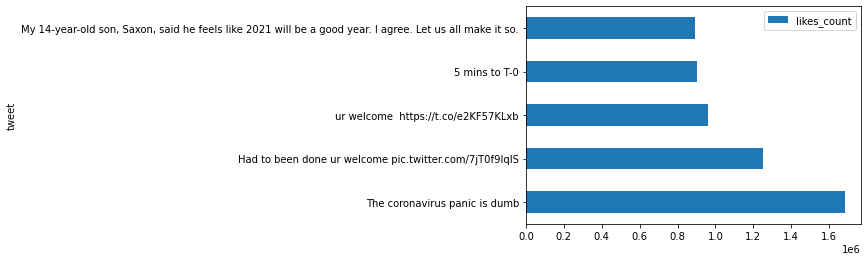

In [24]:
tweet_df.sort_values(by='likes_count', ascending=False).head().plot.barh(y='likes_count', x="tweet")

<AxesSubplot:ylabel='date'>

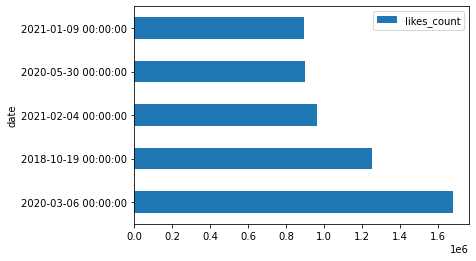

In [25]:
tweet_df.sort_values(by='likes_count', ascending=False).head().plot.barh(y='likes_count', x="date")

# ¿Cuales fueron sus publicaciones más retweeteadas?

In [26]:
tweet_df.sort_values(by='retweets_count', ascending=False)

,id,date,time,tweet,replies_count,retweets_count,likes_count
5339,1053390822991790083,2018-10-19,21,Had to been done ur welcome pic.twitter.com/7j...,18387,384289,1252708
1437,1236029449042198528,2020-03-06,20,The coronavirus panic is dumb,45460,328882,1682551
7788,870369915894546432,2017-06-01,20,Am departing presidential councils. Climate ch...,26151,206708,502853
2079,1205030950750412800,2019-12-12,7,"If life is a video game, the graphics are grea...",10856,178771,773835
3143,1153078534916587520,2019-07-21,23,"Technically, alcohol is a solution",6175,169152,611862
...,...,...,...,...,...,...,...
8592,753795303170420736,2016-07-15,3,yes,12,1,89
7733,872893699511865345,2017-06-08,19,Not yet,3,0,116
8619,752195886990569473,2016-07-10,17,exactly,0,0,77
7744,872869542376030208,2017-06-08,17,Yeah,4,0,134


<AxesSubplot:ylabel='tweet'>

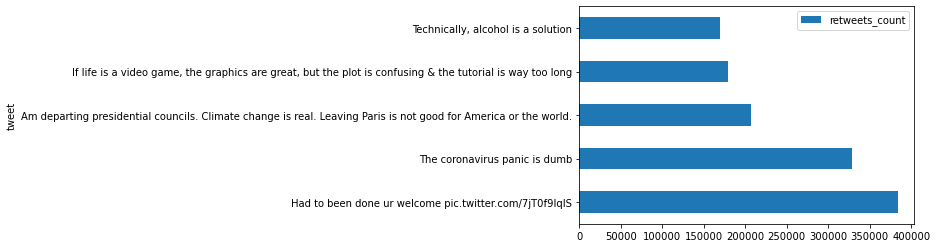

In [27]:
tweet_df.sort_values(by='retweets_count', ascending=False).head().plot.barh(y='retweets_count', x="tweet")

<AxesSubplot:ylabel='date'>

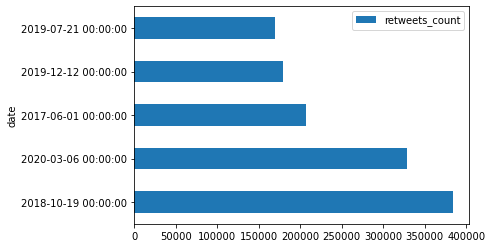

In [28]:
tweet_df.sort_values(by='retweets_count', ascending=False).head().plot.barh(y='retweets_count', x="date")

# ¿A qué horas tweetea Elon?

In [29]:
tweet_times = tweet_df['time'].value_counts()

In [30]:
tweet_times.sort_index()

0     717
1     713
2     630
3     597
4     598
5     617
6     553
7     560
8     497
9     369
10    296
11    227
12    223
13    150
14    259
15    356
16    505
17    623
18    709
19    721
20    692
21    732
22    853
23    718
Name: time, dtype: int64

<AxesSubplot:>

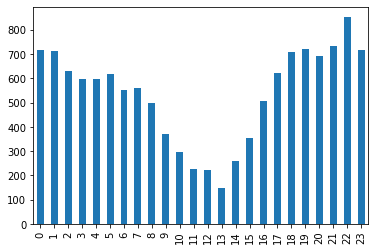

In [31]:
tweet_times.sort_index().plot.bar(x='time')

# Relación con DogeCoin

In [32]:
doge_df=pd.read_csv('datasets/DOGE-USD.csv')

In [33]:
doge_df = doge_df.drop(['Close','Volume','High','Low'],axis=1)

In [34]:
doge_df = doge_df.rename(columns={'Date': 'date', 'Open': 'open'})

In [35]:
doge_df['date']= pd.to_datetime(doge_df["date"])
doge_df['date']

0      2017-11-09
1      2017-11-10
2      2017-11-11
3      2017-11-12
4      2017-11-13
          ...    
1527   2022-01-14
1528   2022-01-15
1529   2022-01-16
1530   2022-01-17
1531   2022-01-18
Name: date, Length: 1532, dtype: datetime64[ns]

In [38]:
doge_df

,date,open
0,2017-11-09,0.001207
1,2017-11-10,0.001421
2,2017-11-11,0.001146
3,2017-11-12,0.001189
4,2017-11-13,0.001046
...,...,...
1527,2022-01-14,0.172053
1528,2022-01-15,0.183644
1529,2022-01-16,0.185093
1530,2022-01-17,0.177187


In [36]:
tweets_most_replied

,id,date,time,tweet,replies_count,retweets_count,likes_count
2141,1392602041025843203,2021-05-13,2,Tesla &amp; Bitcoin https://t.co/YSswJmVZhP,120523,73792,491785
2151,1392030108274159619,2021-05-11,12,Do you want Tesla to accept Doge?,96563,94898,392471
2095,1395328697436033032,2021-05-20,14,How much is that Doge in the window? https://...,70818,52441,302873
2103,1395027147161489412,2021-05-19,18,Tesla has 💎 🙌,68672,55180,452335
2182,1390387635961610242,2021-05-06,23,Make humanity a multiplanet species!,66264,60063,606101


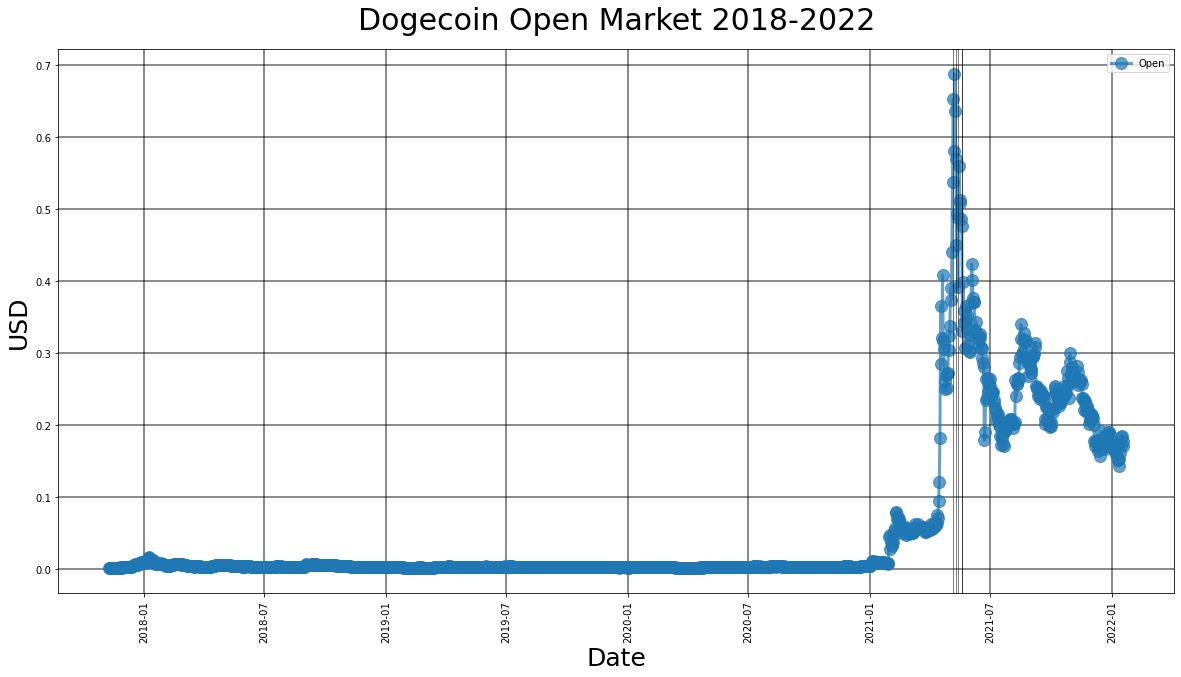

In [37]:
#Generar una grafica con precio de DogeCoin con la fecha de los tweets mas respondidos de Elon, las fechas de los tweets estan marcadas con plt.axvline

import datetime as dt

plt.figure(figsize=(20,10))

plt.plot(doge_df.date,doge_df.open,marker='o',ls='-',lw=3,ms=12,mew=1,alpha=.7)

for date in tweets_most_replied.date:
    plt.axvline(x=date, color='k', linestyle='--',marker='.',ls='-',lw=1,ms=1,mew=1,alpha=.5)
    
plt.xlabel('Date',fontsize = 25)
plt.ylabel('USD',fontsize = 25)
plt.grid(color='k', linestyle='-', linewidth=1.8,alpha=0.5)
plt.tick_params(axis='x', which='major', rotation=90)
plt.tick_params(axis='y', which='major')
plt.title("Dogecoin Open Market 2018-2022",fontsize = 30,pad=20);
plt.legend(['Open']);